# Table of Contents
 <p>

In [1]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
def lin(a,b,x): return a*x+b

In [3]:
a=3.
b=8.

In [4]:
n=30
x = random(n)
y = lin(a,b,x)

In [5]:
x

array([ 0.9985,  0.0554,  0.778 ,  0.3229,  0.1245,  0.9945,  0.8234,  0.484 ,  0.8211,  0.7779,
        0.4474,  0.7617,  0.9709,  0.4697,  0.0652,  0.8487,  0.082 ,  0.7613,  0.4707,  0.8383,
        0.6101,  0.0174,  0.2001,  0.989 ,  0.0362,  0.4088,  0.0597,  0.742 ,  0.4758,  0.152 ])

In [6]:
y

array([ 10.9955,   8.1661,  10.3341,   8.9688,   8.3734,  10.9834,  10.4703,   9.4521,  10.4634,
        10.3337,   9.3422,  10.285 ,  10.9128,   9.4092,   8.1957,  10.5462,   8.246 ,  10.2839,
         9.412 ,  10.5149,   9.8304,   8.0521,   8.6002,  10.9669,   8.1085,   9.2264,   8.179 ,
        10.2259,   9.4275,   8.4559])

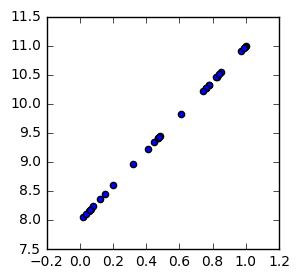

In [7]:
plt.scatter(x,y)

In [8]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [9]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

9.1365

In [ ]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [ ]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [ ]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani